In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chuxu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [103]:
data=pd.read_csv("Data_Final.csv")
data.drop(data.columns[[0]], axis=1, inplace=True)
data.head(5)

,User_id,Bus_id,Star,Useful,Cool,Funny,Review,State,City,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star
0,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5.0,0,0,0,"Great burgers,fries and salad! Burgers have a...",CA,Goleta,4.0,922,1687,694,1070,"2015,2016,2017,2018,2019,20,20,2021",51,4.20
1,JYYYKt6TdVA4ng9lLcXt_g,SZU9c8V2GuREDN5KgyHFJw,5.0,0,0,0,We were a bit weary about trying the Shellfish...,CA,Santa Barbara,4.0,338,800,144,353,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",30,4.12
2,Uk3X2AypU8AqvcYEVf7s6Q,eL4lyE7LNoXEMvpcJ8WNVw,3.0,5,0,0,This was a tough one! On the merits of the w...,CA,Santa Barbara,4.0,431,2126,1245,1476,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",76,4.05
3,LcqNuhqaYt5ekKzaRirmIg,SZU9c8V2GuREDN5KgyHFJw,5.0,2,1,0,"I love trying fresh seafood on piers, wharfs a...",CA,Santa Barbara,4.0,258,452,125,183,"2015,2016,2017",37,3.99
4,gasLVm0KRwrVhPGRcqATjw,CHh0ZFrQcsk4boOItr2Zuw,4.0,1,2,0,I stopped in because I was hungry for some sna...,CA,Carpinteria,3.0,1638,2658,933,2297,"2014,2015,2016,2017,2018,2019,20,20,2021",105,3.79


In [104]:
data.shape

(53845, 17)

## **Text Analysis (Test)** 

In [105]:
review_df = data[['Star','Review']]
review_df.head(5)

,Star,Review
0,5.0,"Great burgers,fries and salad! Burgers have a..."
1,5.0,We were a bit weary about trying the Shellfish...
2,3.0,This was a tough one! On the merits of the w...
3,5.0,"I love trying fresh seafood on piers, wharfs a..."
4,4.0,I stopped in because I was hungry for some sna...


In [106]:
def remove_punc_stopword(text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    remove_punc = [word for word in text if word not in string.punctuation]
    remove_punc = ''.join(remove_punc)
    return [word.lower() for word in remove_punc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
#don't run this yet
#review_df_new = review_df.copy()
#review_df_new['Review'] = review_df_new['Review'].apply(remove_punc_stopword)
#review_df_new.count()

In [107]:
review_df_new = review_df.copy()
review_df_new_test = review_df_new.iloc[0:1000,]
review_df_new_test['Review'] = review_df_new_test['Review'].apply(remove_punc_stopword)
review_df_new_test.count()
review_df_new_test.head()

C:\Users\Chuxu\AppData\Local\Temp\ipykernel_27140\1067826428.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df_new_test['Review'] = review_df_new_test['Review'].apply(remove_punc_stopword)


,Star,Review
0,5.0,"[great, burgersfries, salad, burgers, hint, sa..."
1,5.0,"[bit, weary, trying, shellfish, company, wharf..."
2,3.0,"[tough, one, merits, wine, fairly, average, un..."
3,5.0,"[love, trying, fresh, seafood, piers, wharfs, ..."
4,4.0,"[stopped, hungry, snacks, browsed, store, sinc..."


<Figure size 1000x700 with 0 Axes>

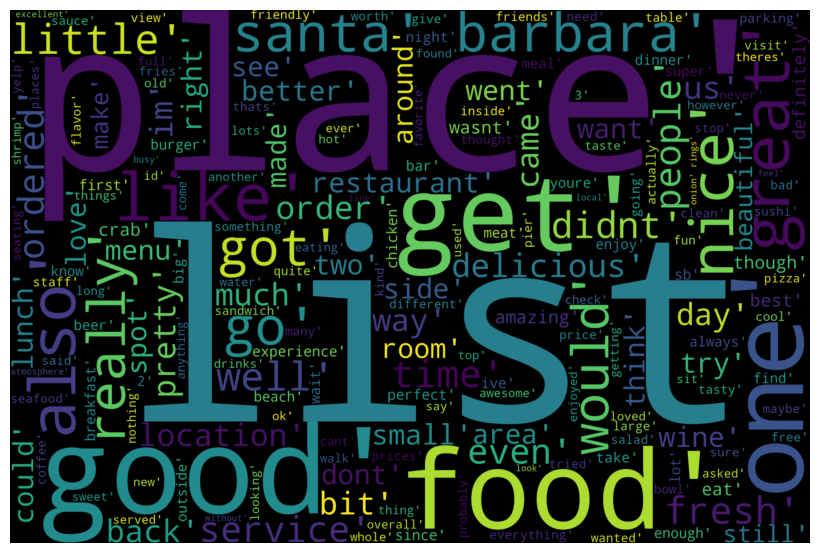

In [108]:
review_df_new_test1 = review_df_new_test['Review'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(review_df_new_test1))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)


In [109]:
test = ' '.join(review_df_new_test.iloc[0,1])
print(test)
print('Score: ',TextBlob(test).sentiment.polarity)

great burgersfries salad burgers hint salt pepper flavor location quaint outdoor seating friendly staff street parking well parking lot back
Score:  0.39166666666666666


In [110]:
review_df_new_test['Review'] = review_df_new_test['Review'].str.join(' ')

C:\Users\Chuxu\AppData\Local\Temp\ipykernel_27140\975496339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df_new_test['Review'] = review_df_new_test['Review'].str.join(' ')


In [111]:
def compute_polarity(text):
    return TextBlob(text).sentiment.polarity
def compute_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [112]:
review_df_new_test['Review_polarity'] = review_df_new_test['Review'].apply(compute_polarity)
review_df_new_test['Review_subjectivity'] = review_df_new_test['Review'].apply(compute_subjectivity)
review_df_new_test

C:\Users\Chuxu\AppData\Local\Temp\ipykernel_27140\2839924278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df_new_test['Review_polarity'] = review_df_new_test['Review'].apply(compute_polarity)
C:\Users\Chuxu\AppData\Local\Temp\ipykernel_27140\2839924278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df_new_test['Review_subjectivity'] = review_df_new_test['Review'].apply(compute_subjectivity)


,Star,Review,Review_polarity,Review_subjectivity
0,5.0,great burgersfries salad burgers hint salt pep...,0.391667,0.416667
1,5.0,bit weary trying shellfish company wharf often...,0.316921,0.543040
2,3.0,tough one merits wine fairly average understan...,0.289090,0.582319
3,5.0,love trying fresh seafood piers wharfs seaside...,0.300470,0.573266
4,4.0,stopped hungry snacks browsed store since spar...,0.261458,0.456250
...,...,...,...,...
995,3.0,much hype bland food nicely prepared dont get ...,0.308144,0.615152
996,3.0,cheapest hotel sb carpinteria goleta area staf...,0.252083,0.504167
997,4.0,beautiful tasting rooms amazing view great sel...,0.539583,0.733333
998,3.0,since dont think anyone cares think food innou...,0.189502,0.490978


In [113]:
X = pd.DataFrame(review_df_new_test["Star"].values)
Y = pd.DataFrame(review_df_new_test["Review_polarity"].values)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

In [114]:
reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)
print('regression_score: ',reg.score(x_test,y_test))


regression_score:  0.1707354758317502


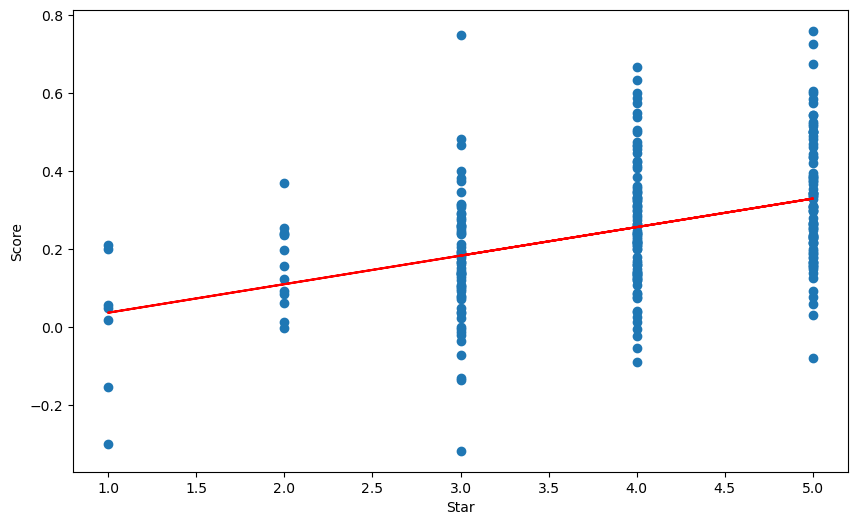

In [118]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
plt.scatter(x_test,y_test)
plt.xlabel('Star')
plt.ylabel('Score')
reg = LinearRegression()
reg.fit(x_test, y_test)
plt.plot(x_test, reg.predict(x_test), color = 'red', label='Model Plot')

## On the Entire Dataset (Long Runtime)

In [51]:
data_test = data.copy()

In [53]:
data_test['Review'] = data_test['Review'].apply(remove_punc_stopword)

In [55]:
data_test['Review'] = data_test['Review'].str.join(' ')
data_test['Review_polarity'] = data_test['Review'].apply(compute_polarity)
data_test['Review_subjectivity'] = data_test['Review'].apply(compute_subjectivity)

In [56]:
X = data_test[['Useful','Cool','Funny','Bus_Ave_Star','User_Review_count','User_Useful_count','User_Funny_count','User_Cool_count','User_Fans','Users_Ave_Star','Review_polarity','Review_subjectivity']]
Y = data_test['Star']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2) 

In [59]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
importances = rf.feature_importances_

In [60]:
y_pred = rf.predict(x_test)
print('random forest accuracy:', accuracy_score(y_test, y_pred))

random forest accuracy: 0.47172439409415917


In [63]:
sorted_indices = np.argsort(importances)[::-1]
feat_labels = X.columns
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) Users_Ave_Star                 0.139740
 2) Useful                         0.112836
 3) User_Review_count              0.109024
 4) User_Cool_count                0.106777
 5) User_Useful_count              0.106713
 6) User_Funny_count               0.106179
 7) Bus_Ave_Star                   0.095090
 8) User_Fans                      0.092988
 9) Funny                          0.065847
10) Cool                           0.064806
11) Review_subjectivity            0.000000
12) Review_polarity                0.000000


### Let us try playing around with the stars, let starts > 3 be 1 ; otherwise 0. (Test)

In [64]:
def label(text):
    if text > 3:
        return 1
    else:
        return 0

In [66]:
review_df_new_test['label'] = review_df_new_test['Star'].apply(label)
review_df_new_test.head(5)

C:\Users\Chuxu\AppData\Local\Temp\ipykernel_27140\1700609663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df_new_test['label'] = review_df_new_test['Star'].apply(label)


,Star,Review,Review_polarity,Review_subjectivity,label
0,5.0,great burgersfries salad burgers hint salt pep...,0.391667,0.416667,1
1,5.0,bit weary trying shellfish company wharf often...,0.316921,0.543040,1
2,3.0,tough one merits wine fairly average understan...,0.289090,0.582319,0
3,5.0,love trying fresh seafood piers wharfs seaside...,0.300470,0.573266,1
4,4.0,stopped hungry snacks browsed store since spar...,0.261458,0.456250,1


In [67]:
def compute_polarity(text):
    return TextBlob(text).sentiment.polarity
def compute_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [70]:
review_df_new_test['Review'] = review_df_new_test['Review'].str.join(' ')
review_df_new_test['Review_polarity'] = review_df_new_test['Review'].apply(compute_polarity)
review_df_new_test['Review_subjectivity'] = review_df_new_test['Review'].apply(compute_subjectivity)
review_df_new_test.head(5)

C:\Users\Chuxu\AppData\Local\Temp\ipykernel_27140\1882319109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df_new_test['Review'] = review_df_new_test['Review'].str.join(' ')
C:\Users\Chuxu\AppData\Local\Temp\ipykernel_27140\1882319109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df_new_test['Review_polarity'] = review_df_new_test['Review'].apply(compute_polarity)
C:\Users\Chuxu\AppData\Local\Temp\ipykernel_27140\1882319109.py:3: SettingWithCopyWarning: 
A value is trying to be set

,Star,Review,Review_polarity,Review_subjectivity,label
0,5.0,g r e a t b u r g e r ...,0.0,0.0,1
1,5.0,b i t w e a r y t r ...,0.0,0.0,1
2,3.0,t o u g h o n e m e ...,0.0,0.0,0
3,5.0,l o v e t r y i n g ...,0.0,0.0,1
4,4.0,s t o p p e d h u n g ...,0.0,0.0,1


In [71]:
X = review_df_new_test[['Review_polarity','Review_subjectivity']]
Y = review_df_new_test['label']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2) #Test to Train ratio is 2:8

In [79]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
importances = rf.feature_importances_

In [80]:
y_pred = rf.predict(x_test)
print('random forest accuracy:', accuracy_score(y_test, y_pred))

random forest accuracy: 0.8113102423623363


### Change stars to 0-1 label: on the entire dataset (Long runtime)

In [74]:
def compute_polarity(text):
    return TextBlob(text).sentiment.polarity
def compute_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def label(text):
    if text > 3:
        return 1
    else:
        return 0


In [75]:
data_test = data.copy()
data_test['Review'] = data_test['Review'].apply(remove_punc_stopword)
data_test['Review'] = data_test['Review'].str.join(' ')
data_test['Review_polarity'] = data_test['Review'].apply(compute_polarity)
data_test['Review_subjectivity'] = data_test['Review'].apply(compute_subjectivity)
data_test['label'] = data_test['Star'].apply(label)

In [76]:
X = data_test[['Useful','Cool','Funny','Bus_Ave_Star','User_Review_count','User_Useful_count','User_Funny_count','User_Cool_count','User_Fans','Users_Ave_Star','Review_polarity','Review_subjectivity']]
Y = data_test['label']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [84]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
Importances = rf.feature_importances_

In [85]:
y_pred = rf.predict(x_test)
print('random forest accuracy:', accuracy_score(y_test, y_pred))

random forest accuracy: 0.8105673693007708


In [86]:
sorted_indices = np.argsort(Importances)[::-1]
feat_labels = X.columns
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            Importances[sorted_indices[f]]))

 1) Review_polarity                0.247482
 2) Users_Ave_Star                 0.113418
 3) Review_subjectivity            0.108365
 4) Bus_Ave_Star                   0.081139
 5) User_Review_count              0.073030
 6) User_Useful_count              0.070012
 7) User_Cool_count                0.069748
 8) User_Funny_count               0.069528
 9) User_Fans                      0.062235
10) Useful                         0.043053
11) Cool                           0.033903
12) Funny                          0.028087


# Try LSTM

Prediction of stars not label

In [ ]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Embedding, Conv1D,MaxPooling1D, Flatten, Dense,Dropout,LSTM,Bidirectional
from keras.optimizers import RMSprop
from keras_preprocessing.sequence import pad_sequences

In [ ]:
# cut reviews after 200 words
maxlen = 200 
# Number of words to consider as features
# restrict the yelp reviews to the top 10000 most common words
max_words = 10000  

In [ ]:
def remove_punc_stopword(text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    remove_punc = [word for word in text if word not in string.punctuation]
    remove_punc = ''.join(remove_punc)
    return [word.lower() for word in remove_punc.split() if word.lower() not in stopwords.words('english')]
def label(text):
    if text > 3:
        return 1
    else:
        return 0

In [ ]:
data_ready = data.copy()
data_ready = data_ready.iloc[0:1000,]
data_ready['review_cleans'] = data_ready['Review'].apply(remove_punc_stopword)
data_ready['Review'] = data_ready['review_cleans'].str.join(' ')
sentences = [item for item in data_ready['Review']]
data_ready['label'] = data_ready['Star'].apply(label)

In [ ]:
# create a tokenizer and it will ignore all except the 10000 most-common words
tokenizer = Tokenizer(num_words = max_words)
# use tokenizer to calculate the frequency of each word in dataset.
tokenizer.fit_on_texts(sentences)
# convert all of reviews to lists of integers
sequences = tokenizer.texts_to_sequences(sentences)
print(len(sequences[1]))
print(len(sequences[2]))


# use pad_sequence to make traning samples the same size, fill with zeros
data_input = pad_sequences(sequences, maxlen = maxlen)
labels = np.asarray(sentences)


In [ ]:
data_input.shape

In [ ]:
labels.shape

In [ ]:
data_ready

In [ ]:
def compute_polarity(text):
    return TextBlob(text).sentiment.polarity
def compute_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [ ]:
df_final = pd.DataFrame(data_input)
df_final['label'] = data_ready['label']

In [ ]:
df_final

In [ ]:
df_final.head()

In [ ]:
X = df_final.iloc[:,:200]
Y = df_final['label']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2) #Test to Train ratio is 2:8

In [ ]:
max_words = 10000
maxlen = 200
model = Sequential()
model.add(Embedding(max_words,64,input_length = maxlen))
model.add(LSTM(32, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
history = model.fit(x_train,y_train, epochs = 20, batch_size = 128, validation_split=0.2)

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.evaluate(x_test, y_test)

Ran on entire dataset

In [ ]:
max_words = 10000
maxlen = 200
model = Sequential()
model.add(Embedding(max_words,64,input_length = maxlen))
model.add(LSTM(32, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

In [ ]:
data_lstm = data.copy()
data_lstm['label'] = data_lstm['Star'].apply(label)
sentences = [item for item in data_lstm['Review']]
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
print(len(sequences[1]))
print(len(sequences[2]))
data_input = pad_sequences(sequences, maxlen = maxlen)
labels = np.asarray(sentences)
df_final_lstm = pd.DataFrame(data_input)
df_final_lstm['label'] = data_lstm['label']

In [ ]:
data_lstm.head()

In [ ]:
X = df_final_lstm.drop(columns = ['label'])
Y = df_final_lstm['label']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2) #Test to Train ratio is 2:8

In [ ]:
df_final_lstm.shape

In [ ]:
history2 = model.fit(x_train,y_train, epochs = 15, batch_size = 128, validation_split=0.2)

In [ ]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.evaluate(x_test, y_test)

Let's try with stars not label this time

In [ ]:
max_words = 10000
maxlen = 200
model = Sequential()
model.add(Embedding(max_words,64,input_length = maxlen))
model.add(LSTM(32, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(6, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
model.summary()

In [ ]:
df_final_lstm['Star'] = data_lstm['Star']
X = df_final_lstm.iloc[:,:200]
Y = df_final_lstm['Star']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2) #Test to Train ratio is 2:8

In [ ]:
history3 = model.fit(x_train,y_train, epochs = 15, batch_size = 128, validation_split=0.2)

In [ ]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.evaluate(x_test, y_test)

Tune our random forest to its finest

In [ ]:
def compute_polarity(text):
    return TextBlob(text).sentiment.polarity
def compute_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def label(text):
    if text > 3:
        return 1
    else:
        return 0

In [ ]:
data_test = data.copy()
data_test['Review'] = data_test['Review'].apply(remove_punc_stopword)
data_test['Review'] = data_test['Review'].str.join(' ')
data_test['Review_polarity'] = data_test['Review'].apply(compute_polarity)
data_test['Review_subjectivity'] = data_test['Review'].apply(compute_subjectivity)
data_test['label'] = data_test['Star'].apply(label)

In [ ]:
X = data_test[['Useful','Cool','Funny','Bus_Ave_Star','User_Review_count','User_Useful_count','User_Funny_count','User_Cool_count','User_Fans','Users_Ave_Star','Review_polarity','Review_subjectivity']]
Y = data_test['label']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

In [ ]:
rf_random.best_params_

In [ ]:
rf = RandomForestClassifier(n_estimators = 1000, min_samples_split = 5, min_samples_leaf = 4, max_features = 'auto', max_depth = 100, bootstrap = True)

In [ ]:
rf.fit(x_train,y_train)

In [ ]:
y_pred = rf.predict(x_test)
print('random forest accuracy:', accuracy_score(y_test, y_pred))

In [ ]:
rf_original = RandomForestClassifier()
rf_original.fit(x_train,y_train)

In [ ]:
y_pred = rf_original.predict(x_test)
print('original random forest accuracy:', accuracy_score(y_test, y_pred))